### EDA Of Pitching Data

In [1]:
#Imports
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

Important to note that the ultimate choice of which variables to use will be up to the user. Issues of collinearity will be possible, depending on user selection.


Therefore, the EDA in this notebook was simply used to help make choices as to which variables to include, but by no means is it comprehensive due to limitations of the problem at hand.

In [2]:
#Reading in Data
career = pd.read_csv('../Data/career_pitcher.csv')

In [3]:
#Interested in correlations of our variables
career.corr()

,Seasons,H,WAR,ERA,K/9,H/9,ER,HBP,K-BB%,Contact%,FB%
Seasons,1.000000,0.805775,0.676852,-0.373355,0.164963,-0.274112,0.803619,0.760554,0.374414,-0.104976,-0.112752
H,0.805775,1.000000,0.863684,-0.247429,0.003940,-0.118702,0.994039,0.885996,0.231783,0.062403,-0.119165
WAR,0.676852,0.863684,1.000000,-0.279921,0.161422,-0.199619,0.831778,0.780115,0.359750,-0.087743,-0.088453
ERA,-0.373355,-0.247429,-0.279921,1.000000,-0.218132,0.771987,-0.219194,-0.252420,-0.489474,0.251367,0.046827
K/9,0.164963,0.003940,0.161422,-0.218132,1.000000,-0.464625,0.007514,0.080840,0.779101,-0.824913,0.186670
H/9,-0.274112,-0.118702,-0.199619,0.771987,-0.464625,1.000000,-0.111446,-0.180357,-0.509908,0.487210,-0.176586
ER,0.803619,0.994039,0.831778,-0.219194,0.007514,-0.111446,1.000000,0.889797,0.220985,0.060853,-0.099768
HBP,0.760554,0.885996,0.780115,-0.252420,0.080840,-0.180357,0.889797,1.000000,0.255328,-0.006498,-0.139116
K-BB%,0.374414,0.231783,0.359750,-0.489474,0.779101,-0.509908,0.220985,0.255328,1.000000,-0.626905,0.128314
Contact%,-0.104976,0.062403,-0.087743,0.251367,-0.824913,0.487210,0.060853,-0.006498,-0.626905,1.000000,-0.134514


Notable correlations:

Volume stats are highly correlated with duration played. For example, total hits allowed and seasons played, are very positively correlated. This obviously makes sense, as the more a pitcher plays, the more hits they will allow.
    
An interesting proportion statistic correlation: K/9 (strikeouts per 9 innings pitched) is highly correlated with ERA (Earn Runs Allowed).

Text(0.5, 0, 'Hits allowed')

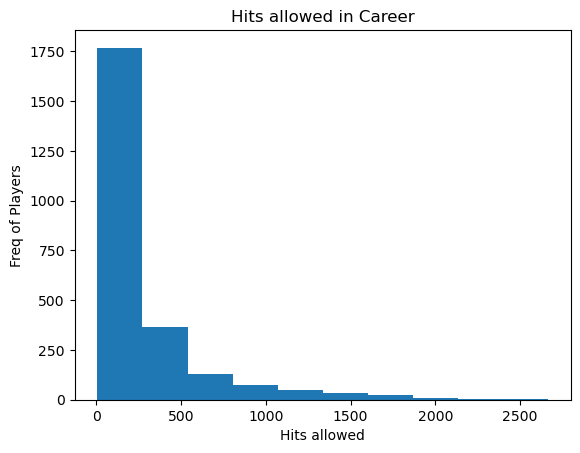

In [13]:
#Looking at some distributions
plt.hist(career['H'])
plt.title('Hits allowed in Career')
plt.ylabel('Freq of Players')
plt.xlabel('Hits allowed')

Very skewed right.

Text(0.5, 0, 'Seasons')

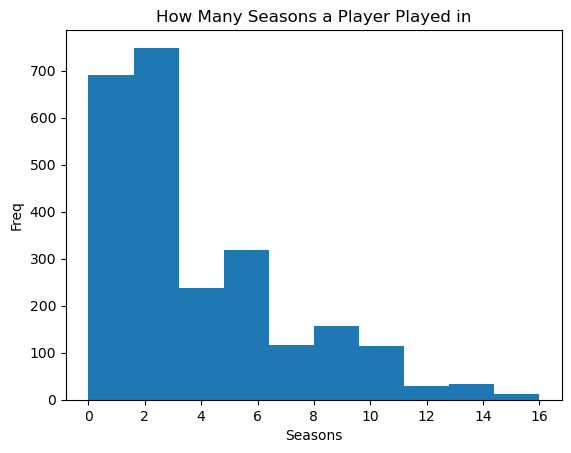

In [14]:
#Histogram for season length
plt.hist(career['Seasons'])
plt.title('How Many Seasons a Player Played in')
plt.ylabel('Freq')
plt.xlabel('Seasons')

Significant how skewed to the right this distribution is. 

When it will come to forecasting, it will be important to select those with enough seasonal data to forecast with, but also important to note how few have more than 10 seasons played.

Text(0.5, 0, 'War')

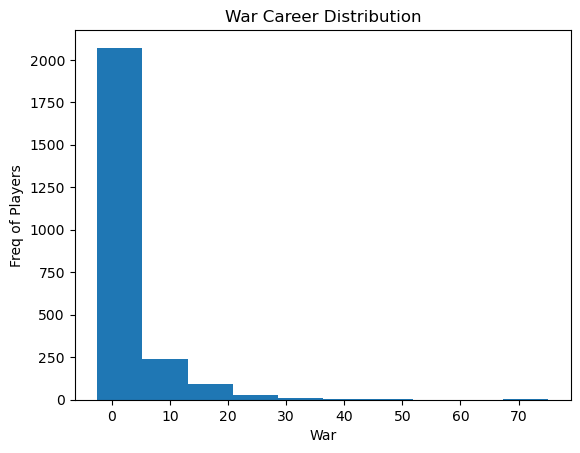

In [9]:
#Career War
plt.hist(career['WAR'])
plt.title('War Career Distribution')
plt.ylabel('Freq of Players')
plt.xlabel('War')

Very skewed right, not many hit above 10 WAR in there career. 

This makes sense, as WAR is wins above replacement level, and obvious replacement level is the average, so to be above that is more on the rare side.

Text(0.5, 0, 'Era')

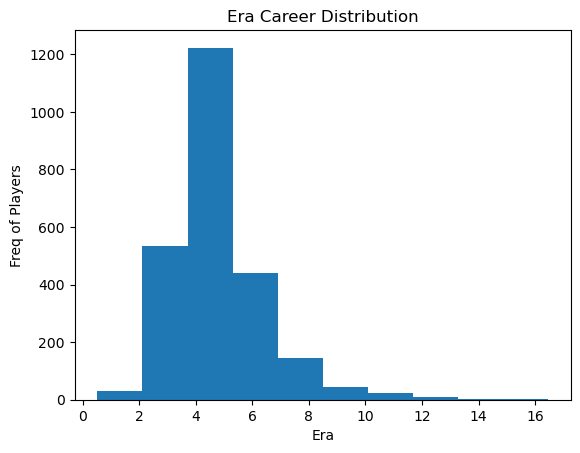

In [8]:
#Career ERA
plt.hist(career['ERA'])
plt.title('Era Career Distribution')
plt.ylabel('Freq of Players')
plt.xlabel('Era')

A bit skewed right, but mostly normally distributed.

Text(0.5, 0, 'k/9')

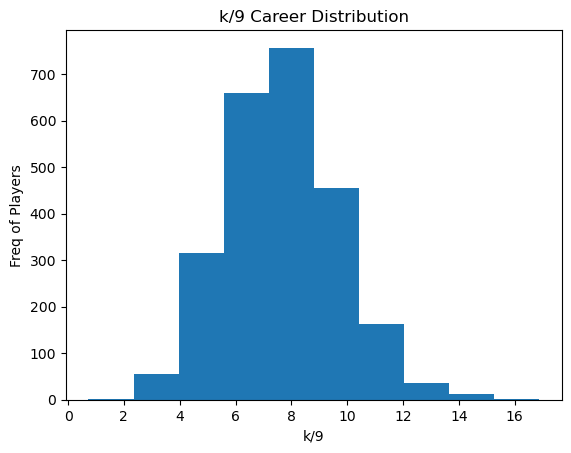

In [6]:
#Career k/9
plt.hist(career['K/9'])
plt.title('k/9 Career Distribution')
plt.ylabel('Freq of Players')
plt.xlabel('k/9')

Approx Normal.

Text(0.5, 0, 'K-BB%')

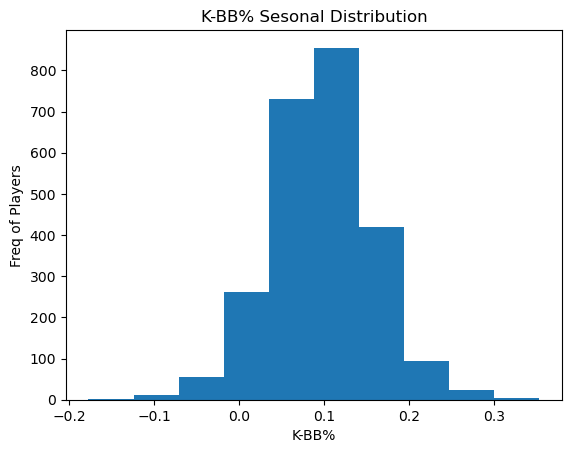

In [7]:
#Career Sv
plt.hist(career['K-BB%'])
plt.title('K-BB% Sesonal Distribution')
plt.ylabel('Freq of Players')
plt.xlabel('K-BB%')

Approx normally distributed.

In [15]:
#Now for career described
career.describe()

,Seasons,H,WAR,ERA,K/9,H/9,ER,HBP,K-BB%,Contact%,FB%
count,2459.000000,2459.000000,2459.000000,2459.000000,2459.000000,2459.000000,2459.000000,2459.000000,2459.000000,2459.000000,2459.000000
mean,3.831232,261.673038,2.702277,4.804904,7.647556,9.176251,124.069947,10.786905,0.097632,0.786856,0.370258
std,3.153837,369.763516,6.407234,1.672461,2.017713,1.835158,166.888007,14.860380,0.060062,0.049057,0.078880
min,0.000000,5.000000,-2.500000,0.520000,0.730000,3.240000,1.000000,0.000000,-0.177000,0.595000,0.135000
25%,1.000000,45.000000,-0.200000,3.780000,6.240000,8.040000,25.000000,2.000000,0.059500,0.758000,0.318000
50%,3.000000,117.000000,0.400000,4.500000,7.570000,8.960000,59.000000,5.000000,0.097000,0.789000,0.370000
75%,5.000000,309.000000,2.400000,5.400000,8.960000,10.080000,145.500000,13.000000,0.135000,0.819000,0.422000
max,16.000000,2666.000000,75.100000,16.460000,16.880000,21.770000,1100.000000,156.000000,0.353000,0.975000,0.660000


Some Interesting Takeaways:

A player pictched on average about 168.835 games in a career.


The average pitcher career statline was 4.8 ERA, 7.647 K/9, 3.27 complete games, and a 2.70 WAR.